In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
FILENAME = "train_series.csv"
# FILENAME = "test_series.csv"
# Demonstration of the baseline on train series. 
#Once the test set will be available, you just have to rename FILENAME to correspond to the test returns csv file.

In [3]:
returns = pd.read_csv(FILENAME, index_col=0)

In [4]:
returns

,Index Name,Index - 9,Index - 8,Index - 7,Index - 6,Index - 5,Index - 4,Index - 3,Index - 2,Index - 1,Index - 0,index ecb,index fed,Index + 1
0,V2X Index,0.001045,0.005841,0.003832,-0.027519,-0.103565,-0.045086,-0.011265,0.005164,0.054050,0.015779,"1126,1471",96,0.010597
1,MOVE Index,-0.021497,0.007891,-0.013175,-0.008436,0.000000,0.026303,0.000556,0.001455,0.007422,0.000000,975,568,0.014492
2,SPX Index,-0.001872,-0.008154,0.023588,0.004086,0.003493,0.003300,0.000885,-0.011304,0.005040,0.000156,"78,806","328,695",0.016263
3,SPX Index,0.004980,-0.000864,0.001677,0.000000,0.006030,-0.001083,0.000419,0.001492,0.001018,-0.002582,"560,1405",118,0.013581
4,EURUSD Curncy,0.000360,-0.001893,0.005579,-0.003056,-0.001171,-0.001623,-0.002350,-0.006444,-0.000729,-0.000365,404,261,0.005092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,SPX Index,-0.002045,-0.003642,0.008096,0.004949,-0.001264,0.000150,0.002482,0.000000,-0.000786,-0.002723,294,195,-0.003198
8942,SX5E Index,-0.027361,0.094386,0.002350,-0.005076,0.022555,0.000963,-0.060170,0.028323,0.006516,-0.000338,277,"199,372",-0.050491
8943,SX5E Index,-0.008359,0.021658,-0.015986,-0.023528,0.020072,0.017822,0.005648,0.017045,0.008557,-0.003072,"78,806","99,625",0.008092
8944,SRVIX Index,0.011945,0.002567,0.000000,0.005115,0.000364,0.003999,0.012978,0.012458,-0.006032,0.005088,"1660,20",79,-0.003784


In [5]:
returns['Index Name'].value_counts(dropna = False)

V2X Index           994
MOVE Index          994
SPX Index           994
EURUSD Curncy       994
EURUSDV1M Curncy    994
CVIX Index          994
VIX Index           994
SX5E Index          994
SRVIX Index         994
Name: Index Name, dtype: int64

In [6]:
returns.info()

#Index ecb et Index fed ne sont PAS de type numeric ou float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8946 entries, 0 to 8945
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  8946 non-null   object 
 1   Index - 9   8946 non-null   float64
 2   Index - 8   8946 non-null   float64
 3   Index - 7   8946 non-null   float64
 4   Index - 6   8946 non-null   float64
 5   Index - 5   8946 non-null   float64
 6   Index - 4   8946 non-null   float64
 7   Index - 3   8946 non-null   float64
 8   Index - 2   8946 non-null   float64
 9   Index - 1   8946 non-null   float64
 10  Index - 0   8946 non-null   float64
 11  index ecb   8946 non-null   object 
 12  index fed   8946 non-null   object 
 13  Index + 1   8946 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.0+ MB


In [7]:
returns.isnull().sum()
#Il n y a pas de donnees manquantes

Index Name    0
Index - 9     0
Index - 8     0
Index - 7     0
Index - 6     0
Index - 5     0
Index - 4     0
Index - 3     0
Index - 2     0
Index - 1     0
Index - 0     0
index ecb     0
index fed     0
Index + 1     0
dtype: int64

In [8]:
returns.drop("Index Name", axis=1, inplace=True)
returns.drop("index ecb", axis=1, inplace=True)
returns.drop("index fed", axis=1, inplace=True)
#returns.drop("Index + 1", axis=1, inplace=True)

In [9]:
#On split les donnees
var_feature = [o for o in returns.columns if o!="Index + 1"]
X = returns[var_feature]
Y = returns["Index + 1"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=2022)


In [10]:
#Modele lineaire standard gaussien avec les donnees des 10 jours precedents juste pour voir 

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
mean_squared_error(Y_test, lin_model.predict(X_test))

0.0015722400183083266

In [12]:
#Classification 
returns['class'] = returns['Index + 1'] > 0

In [13]:
returns

,Index - 9,Index - 8,Index - 7,Index - 6,Index - 5,Index - 4,Index - 3,Index - 2,Index - 1,Index - 0,Index + 1,class
0,0.001045,0.005841,0.003832,-0.027519,-0.103565,-0.045086,-0.011265,0.005164,0.054050,0.015779,0.010597,True
1,-0.021497,0.007891,-0.013175,-0.008436,0.000000,0.026303,0.000556,0.001455,0.007422,0.000000,0.014492,True
2,-0.001872,-0.008154,0.023588,0.004086,0.003493,0.003300,0.000885,-0.011304,0.005040,0.000156,0.016263,True
3,0.004980,-0.000864,0.001677,0.000000,0.006030,-0.001083,0.000419,0.001492,0.001018,-0.002582,0.013581,True
4,0.000360,-0.001893,0.005579,-0.003056,-0.001171,-0.001623,-0.002350,-0.006444,-0.000729,-0.000365,0.005092,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8941,-0.002045,-0.003642,0.008096,0.004949,-0.001264,0.000150,0.002482,0.000000,-0.000786,-0.002723,-0.003198,False
8942,-0.027361,0.094386,0.002350,-0.005076,0.022555,0.000963,-0.060170,0.028323,0.006516,-0.000338,-0.050491,False
8943,-0.008359,0.021658,-0.015986,-0.023528,0.020072,0.017822,0.005648,0.017045,0.008557,-0.003072,0.008092,True
8944,0.011945,0.002567,0.000000,0.005115,0.000364,0.003999,0.012978,0.012458,-0.006032,0.005088,-0.003784,False


In [14]:
var_feature = [o for o in returns.columns if o!="Index + 1" and  o!="class"]
X = returns[var_feature]
Y = returns["class"]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=2022)

clf = LogisticRegression()

clf.fit(X_train, Y_train)

accuracy_score(Y_test, clf.predict(X_test))

0.55367422959702

In [16]:
pip install pyclustering


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=23dbe329dfe0c95a0115a148bc3bc114bd3ba0775d521631e56c0b5b5b86e0da
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [19]:
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#from pyclustering.cluster import clara
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample


In [20]:
import pyclustering.cluster


In [21]:
print(dir(pyclustering.cluster))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'canvas_cluster_descr', 'center_initializer', 'cluster_visualizer', 'cluster_visualizer_multidim', 'color_list', 'gridspec', 'itertools', 'math', 'plt']


In [22]:
returns.drop("Index + 1", axis=1, inplace=True)


In [23]:
returns.drop("class", axis=1, inplace=True)


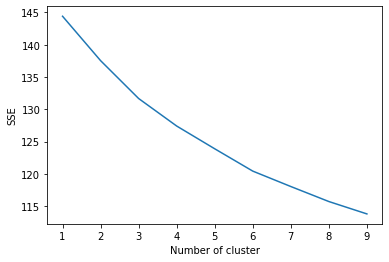

In [24]:
#Clustering

#Choix du nombre de clusters

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, init='k-means++').fit(returns)
    returns["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [25]:
X = returns[["Index - 9", "Index - 8","Index - 7","Index - 6", "Index - 5", "Index - 4", "Index - 3", "Index - 2","Index - 1", "Index - 0"]].values

In [26]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)


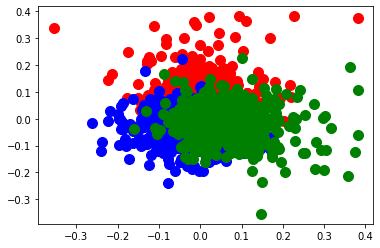

In [27]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

Premier essai d'analyse de sentiments sur les donnees ecb

In [5]:
ecb = pd.read_csv('/content/ecb_data.csv')

In [6]:
ecb.head(20)

,Unnamed: 0,title,speaker,text
0,0,Comments by Yves Mersch at Financial Services ...,Yves Mersch,Comments by Yves Mersch at Financial Service...
1,1,Securing sustained economic growth in the euro...,Vítor Constâncio,Securing sustained economic growth in the eu...
2,2,The role of monetary policy in addressing the ...,Mario Draghi,The role of monetary policy in addressing th...
3,3,The pandemic emergency: the three challenges f...,Philip R. Lane,SPEECH The pandemic emergency: the three c...
4,4,Transmission channels of monetary policy in th...,Peter Praet,Transmission channels of monetary policy in ...
5,5,Domestic and cross-border spillovers of uncon...,Benoît Cœuré,Domestic and cross-border spillovers of unc...
6,6,Household Finance and Consumption - Opening re...,José Manuel González-Páramo,Household Finance and Consumption - Opening ...
7,7,The case for cooperation: cross-border CCP sup...,Benoît Cœuré,The case for cooperation: cross-border CCP s...
8,8,Translating a shared vision into a winning story,Yves Mersch,Translating a shared vision into a winning s...
9,9,Q&A at UBS event,Yves Mersch,TRANSCRIPT Q&A at UBS event Transcript o...


In [8]:
import os
os.environ['NLTK_DATA'] = '/usr/local/share/nltk_data'
import nltk

In [9]:
print(nltk.data.path[0])

/usr/local/share/nltk_data


In [10]:
import nltk
nltk.data.path.append("/root/nltk_data")
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#Language detection
!pip install langdetect


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from langdetect import detect

ecb['language'] = ecb['text'].apply(lambda x: detect(str(x)))

In [13]:
for lang in ecb['language'].unique():
    stop_words = set(nltk.corpus.stopwords.words(lang))
    lemmatizer = nltk.stem.WordNetLemmatizer()
    ecb.loc[ecb['language'] == lang, 'tokenized_text'] = ecb[ecb['language'] == lang]['text'].apply(lambda x: nltk.word_tokenize(str(x)))
    ecb.loc[df['language'] == lang, 'cleaned_text'] = ecb[ecb['language'] == lang]['tokenized_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    ecb.loc[ecb['language'] == lang, 'lemmatized_text'] = ecb[ecb['language'] == lang]['cleaned_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


OSError: ignored

In [33]:
titles = ecb["title"].str.cat(sep = " ")
titles = titles.lower()

In [34]:
tokens_titles = nltk.word_tokenize(titles)


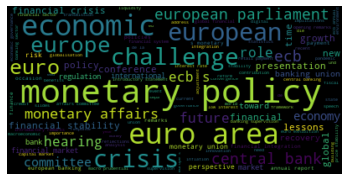

In [35]:
wordcloud = WordCloud().generate(" ".join(tokens_titles))

plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()

In [60]:
ecb['tokenized_text'] = ecb['text'].apply(nltk.word_tokenize)

In [36]:
#TextBlob
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from textblob import TextBlob

In [14]:
#Fonction pour appliquer textblob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

In [18]:
ecb['text'] = ecb['text'].astype(str)

In [16]:
type(ecb['text'])

pandas.core.series.Series

In [21]:
ecb['sentiment_score'] = ecb['text'].apply(get_sentiment)

In [22]:
ecb.loc[ecb['sentiment_score'].idxmax()]['text']

'  Les décisions de la BCE depuis la crise : un tour d’horizon   Presentation by Benoît Cœuré, Member of the Executive Board of the ECB,at La Cour des comptes,Paris, 11 mai 2016 (Slides available for download)     SEE ALSO  Find out more about related content   Slides from the presentation Slides in pdf format (FR)   '

In [25]:
ecb.loc[ecb['sentiment_score'].idxmin()]['title']

'Ist die europäische Wirtschafts- und Währungsunion  eine Solidargemeinschaft?  Soll sie es sein?'

In [1]:
ecb['sentiment_score'].describe()

NameError: ignored

In [26]:
#Transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from transformers import pipeline
from transformers import LongformerTokenizer, LongformerModel

In [28]:
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = LongformerModel.from_pretrained('allenai/longformer-base-4096')

Some weights of the model checkpoint at allenai/longformer-base-4096 were not used when initializing LongformerModel: ['lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing LongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
inputs = []

for text in ecb["text"]:
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True)
    inputs.append(input_ids)

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

inputs = pad_sequences(inputs, maxlen=512, dtype="long", value=0, truncating="post", padding="post")


In [ ]:
#On applique le modele sur les imputs
import torch

with torch.no_grad():
    inputs = torch.LongTensor(inputs)
    outputs = model(inputs)